In [5]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_IND = df[(df['job_title']=='Data Analyst') & (df['job_location']=='India')].copy()

In [7]:
df_DA_IND['job_posted_month_no'] = df_DA_IND['job_posted_date'].dt.month

In [8]:
df_DA_IND_explode = df_DA_IND.explode('job_skills')

In [16]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no', columns='job_skills', fill_value=0, aggfunc='size')
df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()
df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')
df_DA_IND_pivot

job_skills,airflow,alteryx,ansible,aws,azure,bash,bigquery,c,c#,c++,...,trello,unix,vba,visio,visual basic,vmware,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,3,2,0,0,1,1,0,...,0,2,1,0,0,0,0,0,0,0
2,1,3,0,2,2,0,0,1,0,2,...,0,3,3,0,0,0,1,0,2,0
3,0,1,0,1,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,1,0,1,1,0,...,0,0,1,1,0,0,0,0,2,0
5,0,4,0,3,6,0,1,2,0,0,...,0,0,2,0,0,0,1,0,3,0
6,1,4,0,4,5,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
7,0,1,0,2,4,0,0,1,5,0,...,1,1,5,0,0,0,0,0,1,0
8,5,1,0,7,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,3,0
9,1,0,0,4,1,0,0,0,0,0,...,0,0,2,1,0,2,1,0,0,0


In [19]:
DA_totals = df_DA_IND.groupby('job_posted_month_no').size()

In [23]:
df_DA_IND_percent = df_DA_IND_pivot.div(DA_totals/100, axis=0)
# To change month number to month name
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns='job_posted_month_no')

df_DA_IND_percent



job_skills,airflow,alteryx,ansible,aws,azure,bash,bigquery,c,c#,c++,...,trello,unix,vba,visio,visual basic,vmware,windows,wire,word,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0.000000,0.000000,0.000000,7.500000,5.000000,0.000000,0.000000,2.500000,2.500000,0.000000,...,0.000000,5.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,2.564103,7.692308,0.000000,5.128205,5.128205,0.000000,0.000000,2.564103,0.000000,5.128205,...,0.000000,7.692308,7.692308,0.000000,0.000000,0.000000,2.564103,0.000000,5.128205,0.000000
Mar,0.000000,4.000000,0.000000,4.000000,4.000000,0.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,0.000000,0.000000,0.000000,0.000000,13.043478,4.347826,0.000000,4.347826,4.347826,0.000000,...,0.000000,0.000000,4.347826,4.347826,0.000000,0.000000,0.000000,0.000000,8.695652,0.000000
May,0.000000,10.810811,0.000000,8.108108,16.216216,0.000000,2.702703,5.405405,0.000000,0.000000,...,0.000000,0.000000,5.405405,0.000000,0.000000,0.000000,2.702703,0.000000,8.108108,0.000000
Jun,2.222222,8.888889,0.000000,8.888889,11.111111,2.222222,2.222222,0.000000,0.000000,0.000000,...,0.000000,2.222222,0.000000,0.000000,2.222222,0.000000,0.000000,0.000000,2.222222,0.000000
Jul,0.000000,1.785714,0.000000,3.571429,7.142857,0.000000,0.000000,1.785714,8.928571,0.000000,...,1.785714,1.785714,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000
Aug,9.259259,1.851852,0.000000,12.962963,5.555556,1.851852,0.000000,1.851852,0.000000,0.000000,...,1.851852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.555556,0.000000
Sep,1.923077,0.000000,0.000000,7.692308,1.923077,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.846154,1.923077,0.000000,3.846154,1.923077,0.000000,0.000000,0.000000


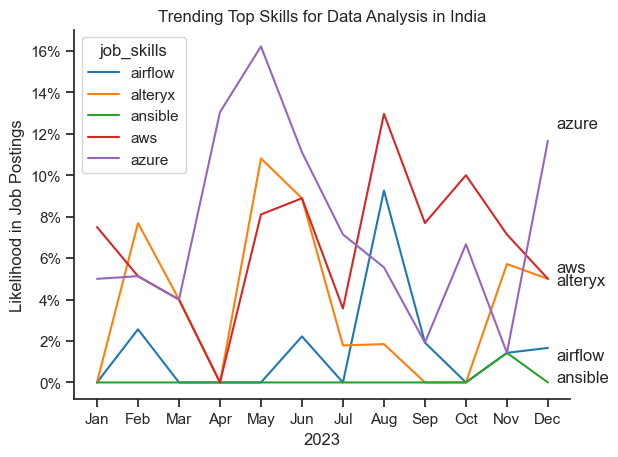

In [ ]:
df_plot = df_DA_IND_percent.iloc[:,:5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysis in India')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    y_pos = df_plot.iloc[-1, i]
    adjustment = (i - 2) * 0.3
    plt.text(11.2, y_pos + adjustment, df_plot.columns[i])

